<a href="https://colab.research.google.com/github/ambikasadhu1101/Movie-Sentiment-analysis-using-NN-s/blob/master/ReviewClassificationKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Movie Review Sentiment analysis (into positive or negative) using Neural Networks and Keras.**

In [0]:
from keras.datasets import imdb

In [0]:
(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words=10000) #consider the top 10000 frequent words

In [0]:
print(x_train[0])

In [0]:
word_idx=imdb.get_word_index() #returns a mapping of words to their indices in the vocab

In [0]:
word_idx.items()

In [0]:
#reverse mapping to see the actual review
idx_word=dict([val,key] for key,val in word_idx.items())

In [0]:
actual_review= ' '.join([idx_word.get(idx-3,'#') for idx in x_train[0]])

In [0]:
len(x_train)

25000

**Vectorise the review**

In [0]:
# represent it as a vector of 0's and 1's 
# vocab size is 10000 so each vector will have a length of 10000

In [0]:
import numpy as np

In [0]:
def vectorise_sentences(sentences,dims=10000):
  #sentences is a list of numbers(basically a linear array)
  output= np.zeros((len(sentences),dims))
  for i,idx in enumerate(sentences): 
    #print(i,idx)
    output[i,idx]=1
  return output

In [0]:
print(vectorise_sentences(x_train))

[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]


In [0]:
x_train=vectorise_sentences(x_train)
x_test=vectorise_sentences(x_test)

In [0]:
y_train=np.asarray(y_train).astype('float32')
y_test=np.asarray(y_test).astype('float32')

**Defining the model architecture**

In [0]:
from keras import models
from keras.layers import Dense #for creating dense layer

In [0]:
#define the model
model= models.Sequential() # a linear stack of layers
model.add(Dense(16,activation='relu',input_shape=(10000,)))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid')) #last layer uses the sigmoid to predict probability

In [0]:
#compile the model
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [0]:
model.summary()

**Training and Validation split**

In [0]:
X_val=x_train[:5000]
X_train=x_train[5000:]
Y_val=y_train[:5000]
Y_train=y_train[5000:]

In [0]:
hist=model.fit(X_train,Y_train,epochs=20,batch_size=512,validation_data=(X_val,Y_val))

**Visualisation**

In [0]:
import matplotlib.pyplot as plt

In [0]:
history=hist.history #stores several parameters in the dictionary as a history of the model 

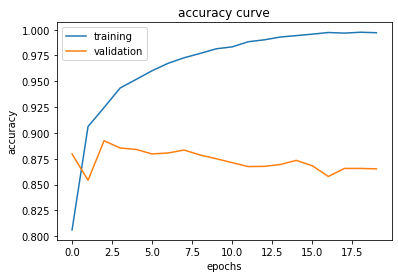

In [54]:
plt.plot(history['acc'],label="training")
plt.plot(history['val_acc'],label="validation")
plt.title("accuracy curve")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

Now, we can see that validation accuracy decreases over time. So we stop training after approximately 4 epochs, to avoid overfitting on the data.

In [0]:
model= models.Sequential() # a linear stack of layers
model.add(Dense(16,activation='relu',input_shape=(10000,)))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
hist_new=model.fit(X_train,Y_train,epochs=4,batch_size=512,validation_data=(X_val,Y_val))

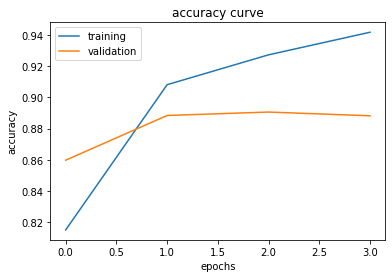

In [58]:
history=hist_new.history
plt.plot(history['acc'],label="training")
plt.plot(history['val_acc'],label="validation")
plt.title("accuracy curve")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

Hence, the final training accuracy is around 94% (Better than 100%)

In [60]:
#Evaluate on the test set
model.evaluate(x_test,y_test)[1]

25000/25000 [==============================] - 2s 64us/step


0.87848

Thus, we achieve an accuracy of 87.8% on the test data.